<a href="https://colab.research.google.com/github/JohatTech/Neural-network-for-house-price-prediction-with-Keras-Tensorflow/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import imageio
import matplotlib.pyplot as plt
##check if i have gpu 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
 data = pd.read_csv("/content/drive/MyDrive/AI and ML projects/dataset/House Price Prediciton dataset/train.csv")

In [ ]:
display(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
1255,1256,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,127500
1256,1257,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,301500
1257,1258,30,RL,56.0,4060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,99900


In [ ]:
data.describe
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

(1259, 81)

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1259.000000,1259.000000,1041.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1252.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,56.914218,70.110471,10524.300238,6.103257,5.570294,1971.478157,1984.816521,103.133387,443.334392,...,94.604448,46.150913,21.625099,3.482129,14.668785,1.819698,45.944400,6.315330,2007.799841,181144.812550
std,363.586303,42.353617,23.522213,10391.598333,1.381394,1.119465,29.933659,20.617506,182.185126,439.025793,...,123.939261,65.449317,60.920712,29.289552,54.093490,32.364185,525.688744,2.684202,1.324095,80588.024473
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,315.500000,20.000000,59.000000,7590.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,630.000000,50.000000,70.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,944.500000,70.000000,80.000000,11611.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213750.000000
max,1259.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


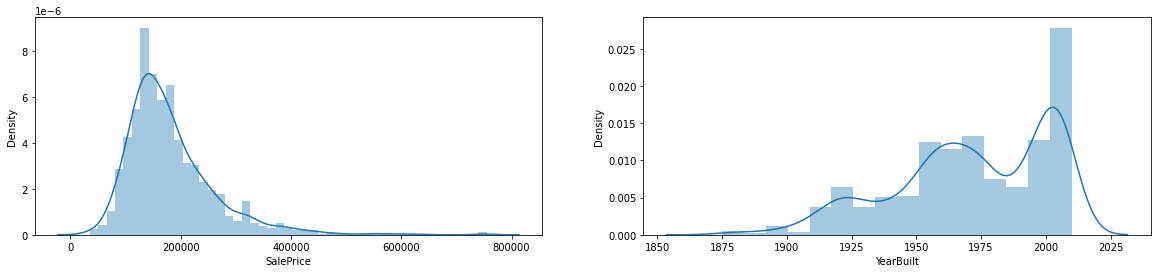

In [ ]:
import seaborn as sns 

#Univariate analysis age.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(data['SalePrice'])##histogram
f.add_subplot(1,2,2)
sns.distplot(data['YearBuilt'])##boxplot

In [ ]:
data['MasVnrArea'].value_counts()

0.0      743
72.0       8
108.0      8
120.0      7
180.0      7
        ... 
412.0      1
376.0      1
161.0      1
224.0      1
554.0      1
Name: MasVnrArea, Length: 291, dtype: int64

In [ ]:
na_variables = [ var for var in data.columns if data[var].isnull().mean() > 0 ]
na_variables

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
floting =  data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
floting.notnull().sum()

LotFrontage    1041
MasVnrArea     1252
GarageYrBlt    1188
dtype: int64

In [ ]:
##making imputation with the mean, for the missing values of numeric features
for i in floting:
 data.loc[data.loc[:,i].isnull(),i]=data.loc[:,i].mean()

In [ ]:
data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
objetc = data[[
 'Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']]

objetc.notnull().sum()

Alley             76
MasVnrType      1252
BsmtQual        1224
BsmtCond        1224
BsmtExposure    1223
BsmtFinType1    1224
BsmtFinType2    1223
Electrical      1259
FireplaceQu      660
GarageType      1188
GarageFinish    1188
GarageQual      1188
GarageCond      1188
PoolQC             4
Fence            240
MiscFeature       51
dtype: int64

In [ ]:
data.drop(data.columns[[6, 72, 74]], axis = 1, inplace = True)

In [ ]:
data['Fence'] = data['Fence'].fillna(data['Fence'].mode()[0])

data['FireplaceQu'] = data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])

In [ ]:
data[['Fence','FireplaceQu']].isnull().sum()

Fence          0
FireplaceQu    0
dtype: int64

In [ ]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [ ]:
categorical = data.select_dtypes(include= "object")
numerical = data.select_dtypes(include = ['float64', 'int64'])
dummies = pd.get_dummies(categorical)
db = pd.concat([dummies, numerical], axis = 1)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Columns: 276 entries, MSZoning_C (all) to SalePrice
dtypes: float64(3), int64(35), uint8(238)
memory usage: 666.5 KB


In [ ]:
X = db.drop('SalePrice', axis = 1 )
Y = db['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 1)
X_train.shape, Y_train.shape

((1007, 275), (1007,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
minMaxScaler = MinMaxScaler()
standarize =  StandardScaler()
normalizer = Normalizer()

x_train_scaled = minMaxScaler.fit_transform(X_train)
x_test_scaled = minMaxScaler.fit_transform(X_test)

y_train = Y_train.values
Y_train_scaled = minMaxScaler.fit_transform(y_train.reshape(-1,1))

y_test = Y_test.values
normalizer.fit(y_test.reshape(-1,1))
Y_test_scaled = minMaxScaler.transform(y_test.reshape(-1,1))
 

In [ ]:
Y_train_scaled.shape

(1007, 1)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras import optimizers

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(64,kernel_initializer='normal', input_dim=275, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse', 'mae'])
    return model

In [ ]:
EPOCHS = 500
batch_size = 300
model = build_model()
history = model.fit(x_train_scaled, Y_train_scaled,epochs=EPOCHS, batch_size=batch_size, validation_split = 0.2, verbose=1)

Epoch 1/500
3/3 [==============================] - 7s 432ms/step - loss: 0.1023 - mse: 0.1023 - mae: 0.2612 - val_loss: 0.0376 - val_mse: 0.0376 - val_mae: 0.1576
Epoch 2/500
3/3 [==============================] - 0s 52ms/step - loss: 0.0557 - mse: 0.0557 - mae: 0.1886 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.1381
Epoch 3/500
3/3 [==============================] - 0s 40ms/step - loss: 0.0464 - mse: 0.0464 - mae: 0.1701 - val_loss: 0.0272 - val_mse: 0.0272 - val_mae: 0.1290
Epoch 4/500
3/3 [==============================] - 0s 35ms/step - loss: 0.0416 - mse: 0.0416 - mae: 0.1635 - val_loss: 0.0250 - val_mse: 0.0250 - val_mae: 0.1231
Epoch 5/500
3/3 [==============================] - 0s 30ms/step - loss: 0.0350 - mse: 0.0350 - mae: 0.1492 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.1233
Epoch 6/500
3/3 [==============================] - 0s 31ms/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1423 - val_loss: 0.0234 - val_mse: 0.0234 - val_mae: 0.1221
Epoch 7/500
3/3 [==========

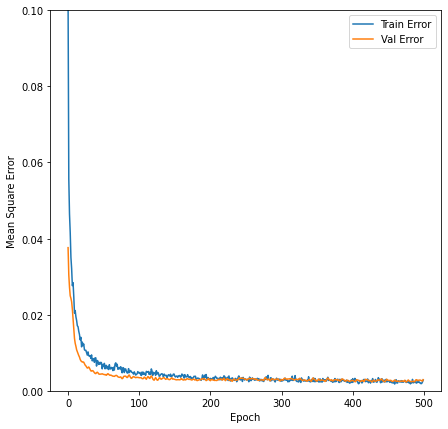

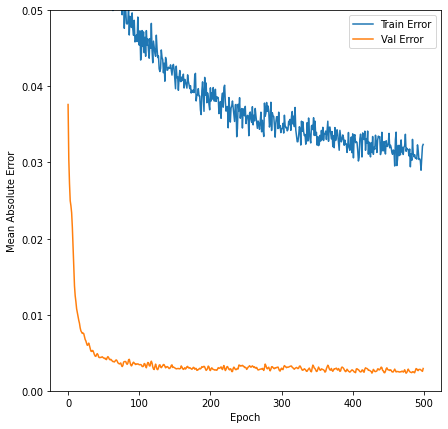

In [ ]:
def plot_hisory(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] =  history.epoch

  plt.figure(figsize=(7,7))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.1])
  plt.legend()

  plt.figure(figsize=(7,7))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.05])
  plt.legend()
  plt.show()
plot_hisory(history)

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/AI and ML projects/dataset/House Price Prediciton dataset/test.csv")
Xnews =  pd.get_dummies(data_test)

In [ ]:
prediction = model.predict(x_test_scaled)
predict_reverse = minMaxScaler.inverse_transform(prediction) 
predict_reverse

array([[143796.61 ],
       [178130.94 ],
       [144243.   ],
       [147833.23 ],
       [141885.67 ],
       [190785.39 ],
       [140706.47 ],
       [127923.266],
       [138837.42 ],
       [176212.83 ],
       [137105.94 ],
       [140189.27 ],
       [176212.83 ],
       [120378.2  ],
       [149175.47 ],
       [138815.88 ],
       [118581.86 ],
       [176212.83 ],
       [182910.23 ],
       [111511.45 ],
       [258463.66 ],
       [173301.77 ],
       [228872.12 ],
       [248047.23 ],
       [124432.89 ],
       [249583.03 ],
       [292153.5  ],
       [223565.6  ],
       [145827.53 ],
       [129706.18 ],
       [204427.92 ],
       [194877.67 ],
       [223403.75 ],
       [259846.52 ],
       [144385.56 ],
       [138877.84 ],
       [213895.   ],
       [193940.92 ],
       [133104.78 ],
       [277372.   ],
       [133857.44 ],
       [148141.64 ],
       [176212.83 ],
       [231009.62 ],
       [137579.05 ],
       [140419.64 ],
       [225747.5  ],
       [37143

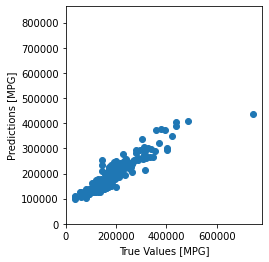

In [ ]:
plt.scatter(Y_test, predict_reverse)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])